Проверить что соотвествует заданию, а что нет.
Проверить комментарии
Заменить файлв linear Illia
Проверить комментарии в linear Illia


In [419]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
import sklearn.metrics 

# Код из предоставленных материалов

In [420]:
class LinearRegression():
    def __init__(self, 
                 learning_rate = 0.5, 
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)
        
        self.n_batches = n_batches
        
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
                self.weights = np.append(self.bias,self.weights)
    
    #---------------------------------
    def forward(self, X):
        return np.dot(X, self.weights)
    
    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size
    
    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size
    
    #---------------------------------
    def update(self):    
        return self.weights - self.lr*self.grad
    
    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)
    
    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat.squeeze()
    
    #---------------------------------
    def score(self, X, y):        
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))
    
    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])
        
        if self.bias is None: 
            self.bias    = self.init(1)
        
        if self.weights.size == X.shape[1]:
            self.weights = np.append(self.bias,self.weights)
        
        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:            
            self.batch_size = y.size
            
        if self.n_batches is None:
            self.n_batches = y.size//self.batch_size
            
        for i in range(self.epochs): 
            loss = 0
            for cnt,(x_batch, y_batch) in enumerate(self.load_batch(X,y)): 

                yhat         = self.forward(x_batch)
                self.grad    = self.grad_step(yhat,  y_batch, x_batch) 
                self.weights = self.update() 
                loss += self.loss(yhat,  y_batch)
                
                if cnt>= self.n_batches:
                    break
            self.cost[i] = loss/self.n_batches
        
        self.bias = self.weights[0]
    #---------------------------------
    def load_batch(self,X,y):
        idxs = np.arange(y.size)
        np.random.shuffle(idxs)

        for i_batch in range(0,y.size,self.batch_size):
            idx_batch = idxs[i_batch:i_batch+self.batch_size]
            x_batch   = np.take(X, idx_batch,axis=0)
            x_batch   = self.add_bias(x_batch)
            y_batch   = np.take(y, idx_batch)
            yield  x_batch, y_batch
    
    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))
    
    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()
    
    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

In [421]:
class ElasticRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty = 0.0,
                 l2_penalty = 0.0,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 n_batches    = None,
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         n_batches    = n_batches,
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
        
    #---------------------------------
    def loss(self,yhat, y):   
        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size
        return np.square(yhat - y).mean() + l1_term + l2_term
                  
    #---------------------------------
    def update(self):    
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + np.sign(self.weights)*self.l1_penalty  + l2_term)

In [422]:
_EPS_ = 1e-6

class LogisticRegression(ElasticRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty    = 0.0,
                 l2_penalty    = 0.0,
                 epochs        = 100, 
                 weights       = None, 
                 bias          = None, 
                 threshold     = 0.5,
                 batch_size    = 1000, 
                 n_batches     = None,
                 random_state  = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         n_batches    = n_batches,
                         random_state = random_state,
                         l1_penalty = l1_penalty,
                         l2_penalty = l2_penalty)       
        self.learning_rate = learning_rate/2
        self.threshold = threshold
    #---------------------------------    
    def loss(self,yhat, y):
        
        l1_term = self.l1_penalty*np.sum(self.weights[1:])
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        
        return -(y*np.log(yhat  + _EPS_)+(1 - y)*np.log(1 - yhat  + _EPS_)).mean()\
            + l1_term+ l2_term   
    #---------------------------------
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))     
    #---------------------------------
    def forward(self, X):     
        return self.sigmoid(np.dot(X, self.weights))   
    #---------------------------------
    def to_class(self,logit):
        return (logit>=self.threshold)*1   
    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return self.to_class(yhat)

    #---------------------------------
    def predict_prob(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat 
    
    #---------------------------------
    def score(self, X, y):
        yhat  = self.predict(X)
        return sum((yhat==y)*1)/y.size
    #---------------------------------
    def plot_desicion_function(self,X,y,figsize = (12,6),
                               marker = 'o',colors =("#FF0000", '#0000FF'),
                               alpha=0.9, s = 150, poly = False, order = 2):
        plt.figure(figsize = figsize)
        cm_bright = ListedColormap(colors)
        plt.scatter(X[:, 0], X[:, 1],marker = marker, c=y, cmap=cm_bright,s = s, alpha =alpha);
        h =  (X[:, 0].max() - X[:, 0].min())/50
        x_min, x_max = X[:, 0].min()-0.5 , X[:, 0].max()+0.5
        y_min, y_max = X[:, 1].min()-0.5 , X[:, 1].max()+0.5    
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        if poly:
            Z = self.predict_prob(to_polynom(np.c_[xx.ravel(), yy.ravel()],order))-0.5
        else:
            Z = self.predict_prob(np.c_[xx.ravel(), yy.ravel()])-0.5
        cm = plt.cm.RdBu
        Z = Z.reshape(xx.shape) 
        plt.contourf(xx, yy, Z, cmap=cm, alpha=.5)
        plt.xticks([],[])
        plt.yticks([],[])
        plt.tight_layout()
    #---------------------------------
    def classification_report(self, X,y):
        tp = 0 # true_positives
        tn = 0 # true_negatives
        fp = 0 # false_positives
        fn = 0 # false_negatives
        
        yhat  = self.predict(X)
        total = yhat.size
        n= sum(yhat==0)
        p = sum(yhat==1)
        
        for yhati,yi in zip(yhat,y):
            if yi == 1 and yhati == 1:
                tp += 1
            elif yi == 0 and yhati == 0:
                tn += 1
            elif yi == 1 and yhati == 0:
                fn += 1
            elif yi == 0 and yhati == 1:
                fp += 1

        print('True Positives:%.4f'%(tp/p), end = '\t')
        print('True Negatives:%.4f'%(tn/n))
        print('False Positives:%.4f'%(fp/p), end = '\t')
        print('False Negatives:%.4f'%(fn/n))
        print('Accuracy:%.4f'% ((tp + tn) / total))
        print('Recall:%.4f'% (tp / (tp + fn)), end = '\t')
        print('Precision:%.4f'%(tp / (tp + fp)))
        print('f1 measure:%.4f'%(tp / (tp + 0.5*(fp+fn))))

In [423]:
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    X, y = ds

    cm_bright = ListedColormap(colors)
    ax.set_title(name, fontsize = 30)
    if facecolor:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

## Задание 1

### 1.1

In [424]:
N = 250

def make_binary_clf(N, noises, method = 'line',
                    random_state = 42):

    if random_state: rng = np.random.RandomState(seed = random_state)
    
    if method == 'line' or method is None:
        X, y = make_classification(n_samples=N, n_features=2,
                                   n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, class_sep=2,
                                   random_state=random_state)
        X += np.random.randn(*X.shape) *noises
        out = (X, y)
    
    elif method == 'moons':
        X, y = make_moons(n_samples=N, noise=noises, 
                          random_state=random_state)
    
    elif method == 'circles':    
        X, y = make_circles(n_samples=N, noise=noises, factor=0.5,
                            random_state=random_state )

    
    return X,y

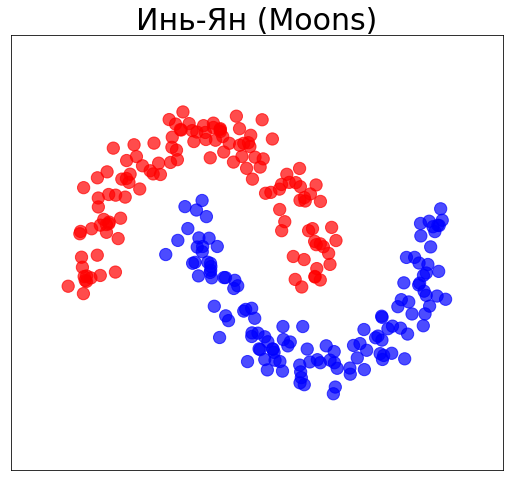

In [425]:
fig=plt.figure(figsize=(30,8))

ax = plt.subplot(1, 3, 1)
plot_data(ax,make_binary_clf(N,noises = 0.1,method = 'moons'), 
          'Инь-Ян (Moons)')

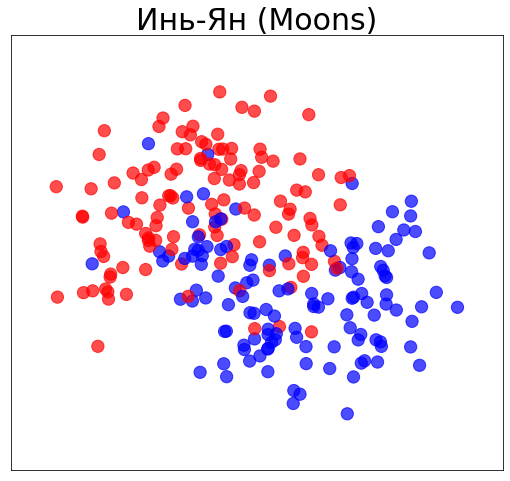

In [426]:
fig=plt.figure(figsize=(30,8))
ax = plt.subplot(1, 3, 2)
plot_data(ax,make_binary_clf(N,noises = 0.36,method = 'moons'), 
          'Инь-Ян (Moons)')

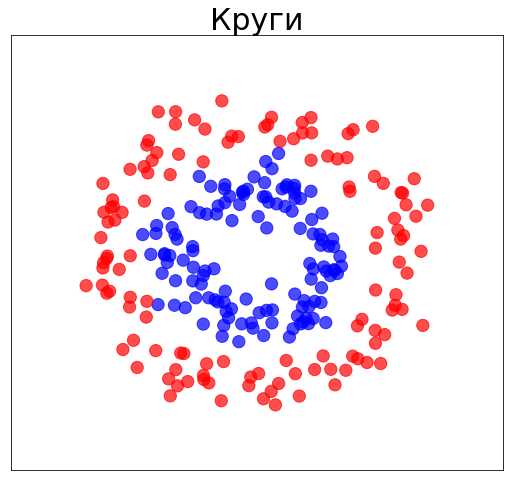

In [427]:

fig=plt.figure(figsize=(30,8))

ax = plt.subplot(1, 3, 1)
plot_data(ax,make_binary_clf(N,noises = 0.1,method = 'circles'), 
          'Круги')

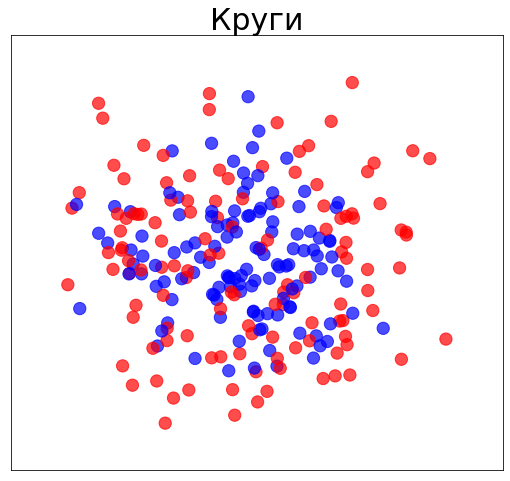

In [428]:
fig=plt.figure(figsize=(30,8))

ax = plt.subplot(1, 3, 2)
plot_data(ax,make_binary_clf(N,noises = 0.4,method = 'circles'), 
          'Круги')

### 1.2

In [429]:
def to_polynom(X, order = 5):
    order_range = range(order, order+1,1)
    out = np.copy(X) 
    for i in order_range:
        out = np.hstack([out, np.power(X,i)])
    return out

In [430]:
X,y = make_binary_clf(N,noises =0.4,method = 'moons')

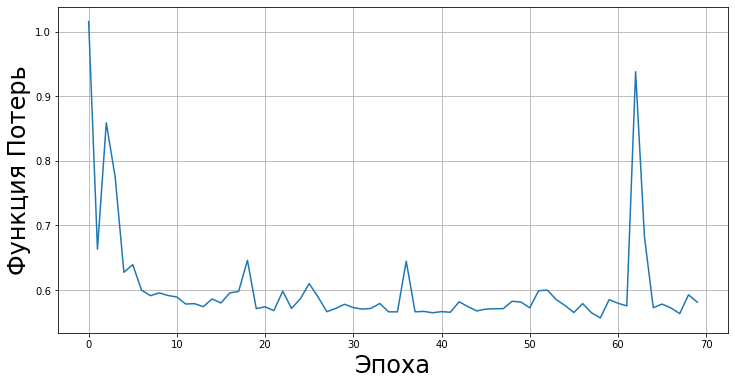

0.8412698412698413 0.7967914438502673
True Positives:0.8485	True Negatives:0.8333
False Positives:0.1515	False Negatives:0.1667
Accuracy:0.8413
Recall:0.8485	Precision:0.8485
f1 measure:0.8485


In [431]:
X_poly   = to_polynom(X, order = 4)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=42)

regr = LogisticRegression(learning_rate=0.3,
                          epochs=100,batch_size=50)

regr.fit(X_train, y_train)

regr.plot_cost()

print(regr.score(X_test, y_test), regr.score(X_train, y_train))

regr.classification_report(X_test, y_test)

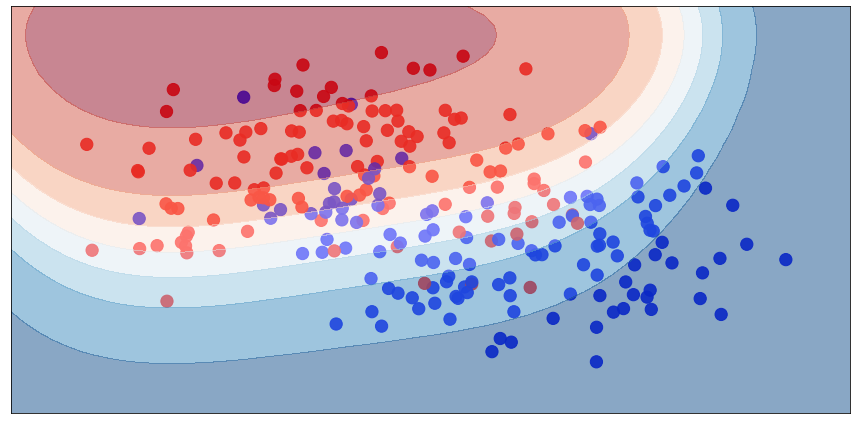

In [432]:
regr.plot_desicion_function(X_poly,y,
                            poly = True, order = 4)

C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


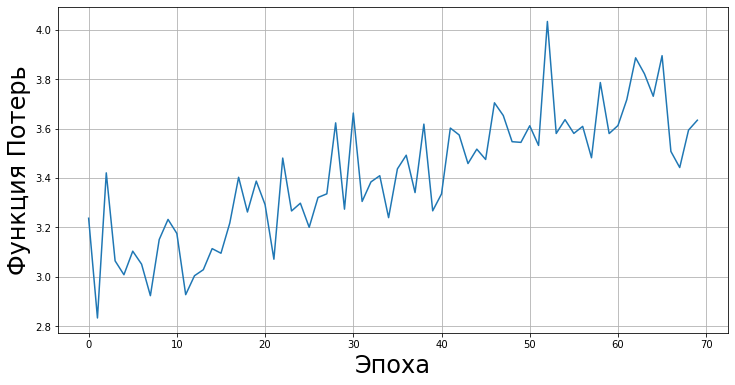

0.6533333333333333 0.6628571428571428
True Positives:0.6970	True Negatives:0.6190
False Positives:0.3030	False Negatives:0.3810
Accuracy:0.6533
Recall:0.5897	Precision:0.6970
f1 measure:0.6389


C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


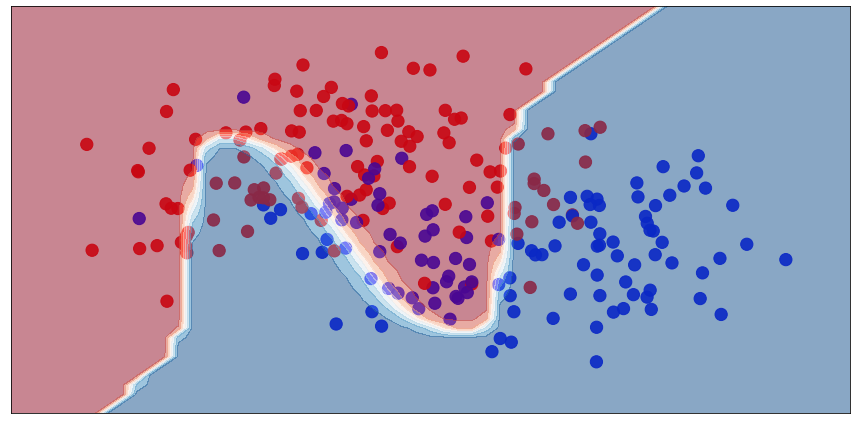

In [433]:
X_poly_9   = to_polynom(X, order = 9)

X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_poly_9, y, test_size=0.3, random_state=42)

regr_9 = LogisticRegression(learning_rate=0.3,
                          epochs=100,batch_size=50)

regr_9.fit(X_train_9, y_train_9)

regr_9.plot_cost()

print(regr_9.score(X_test_9, y_test_9), regr_9.score(X_train_9, y_train_9))

regr_9.classification_report(X_test_9, y_test_9)

regr_9.plot_desicion_function(X_poly_9,y,
                            poly = True, order = 9)


C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


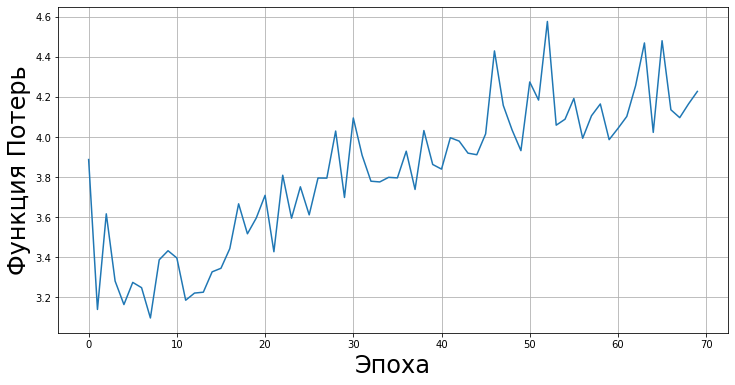

0.7466666666666667 0.6971428571428572
True Positives:0.7778	True Negatives:0.7179
False Positives:0.2222	False Negatives:0.2821
Accuracy:0.7467
Recall:0.7179	Precision:0.7778
f1 measure:0.7467


C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


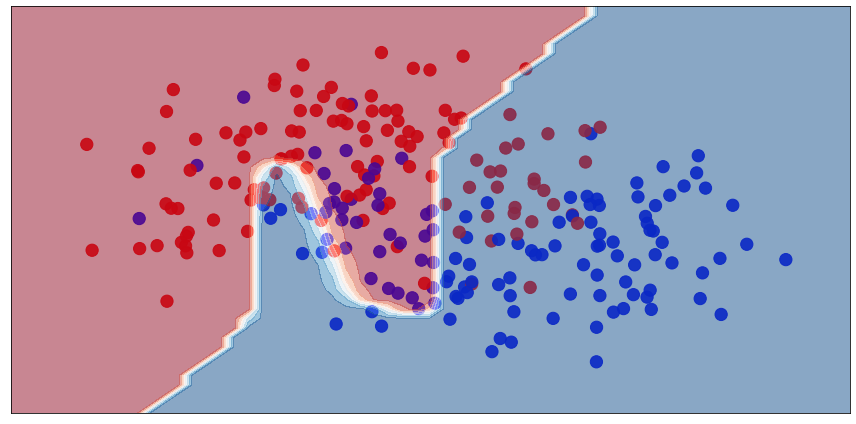

In [434]:
X_poly_13   = to_polynom(X, order = 13)

X_train_13, X_test_13, y_train_13, y_test_13 = train_test_split(X_poly_13, y, test_size=0.3, random_state=42)

regr_13 = LogisticRegression(learning_rate=0.3,
                          epochs=100,batch_size=50)

regr_13.fit(X_train_13, y_train_13)

regr_13.plot_cost()

print(regr_13.score(X_test_13, y_test_13), regr_13.score(X_train_13, y_train_13))

regr_13.classification_report(X_test_13, y_test_13)

regr_13.plot_desicion_function(X_poly_13,y,
                            poly = True, order = 13)

C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


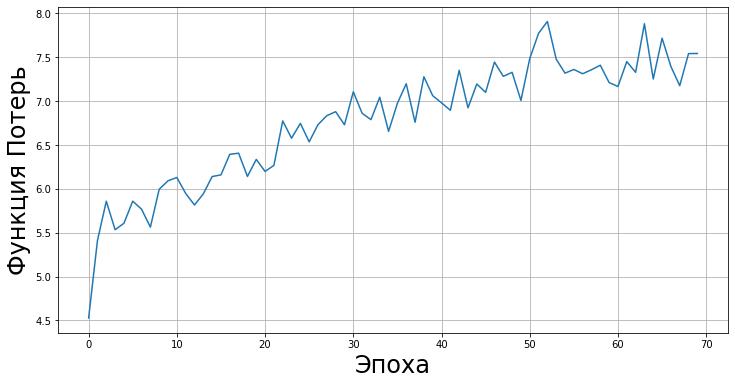

0.6133333333333333 0.5828571428571429
True Positives:0.6190	True Negatives:0.6061
False Positives:0.3810	False Negatives:0.3939
Accuracy:0.6133
Recall:0.6667	Precision:0.6190
f1 measure:0.6420


C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


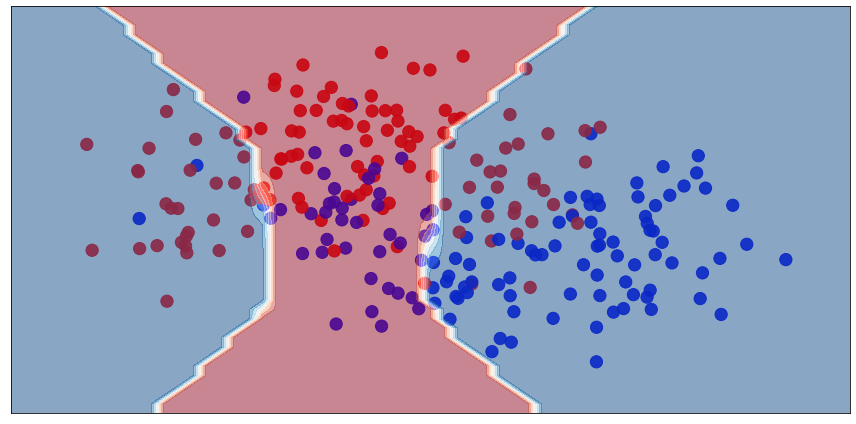

In [435]:
X_poly_16   = to_polynom(X, order = 16)

X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_poly_16, y, test_size=0.3, random_state=42)

regr_16 = LogisticRegression(learning_rate=0.25,
                          epochs=100,batch_size=50)

regr_16.fit(X_train_16, y_train_16)

regr_16.plot_cost()

print(regr_16.score(X_test_16, y_test_16), regr_16.score(X_train_16, y_train_16))

regr_16.classification_report(X_test_16, y_test_16)

regr_16.plot_desicion_function(X_poly_16,y,
                            poly = True, order = 16)

Лучше всего справился полином 9 степени и 13. При меньших степенях и больших модель показывала себя хуже.

Добавим на 13 степень ElasticRegression.

C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


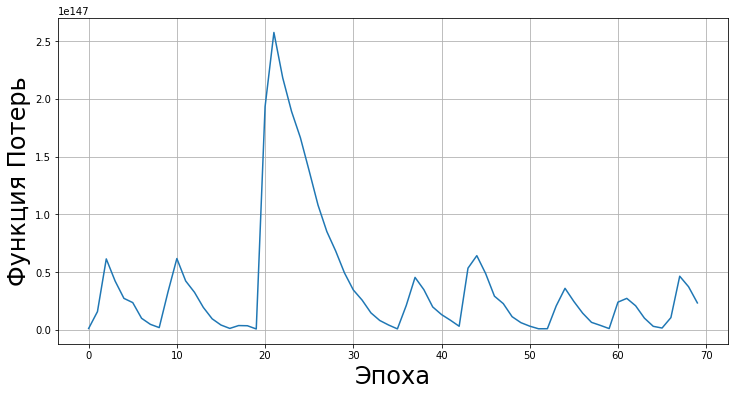

C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


0.5586592178770949 0.5598563447725459
True Positives:0.8390	True Negatives:0.5526
False Positives:0.1610	False Negatives:0.4474
Accuracy:0.5587
Recall:0.0390	Precision:0.8390
f1 measure:0.0746


ValueError: shapes (50994951,5) and (13,) not aligned: 5 (dim 1) != 13 (dim 0)

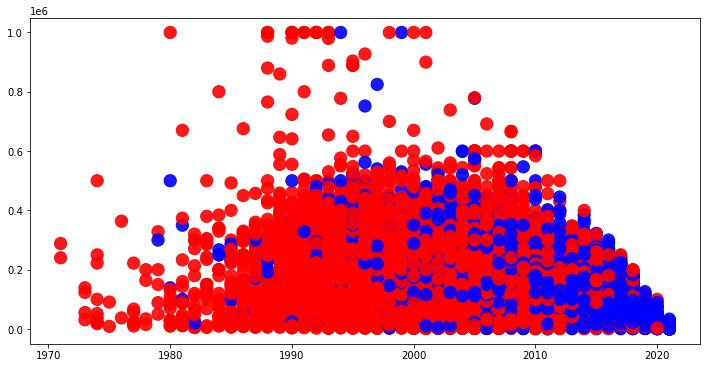

In [471]:
X_poly_13   = to_polynom(X, order = 13)

X_train_13, X_test_13, y_train_13, y_test_13 = train_test_split(X_poly_13, y, test_size=0.3, random_state=42)

regr_13_l1l12 = LogisticRegression(learning_rate=0.3,
                          epochs=100,batch_size=50,l1_penalty=0.01,l2_penalty=0.00001)

regr_13_l1l12.fit(X_train_13, y_train_13)

regr_13_l1l12.plot_cost()

print(regr_13_l1l12.score(X_test_13, y_test_13), regr_13_l1l12.score(X_train_13, y_train_13))

regr_13_l1l12.classification_report(X_test_13, y_test_13)

regr_13_l1l12.plot_desicion_function(X_poly_13,y,
                            poly = True, order = 13)

### 1.3

In [437]:
print(f"Полином 4 {regr.score(X_test, y_test), regr.score(X_train, y_train)}")

regr.classification_report(X_test, y_test)

print(' ')

print(f"Полином 9 {regr_9.score(X_test_9, y_test_9), regr_9.score(X_train_9, y_train_9)}")

regr_9.classification_report(X_test_9, y_test_9)

print(' ')

print(f"Полином 13 {regr_13.score(X_test_13, y_test_13), regr_13.score(X_train_13, y_train_13)}")

regr_13.classification_report(X_test_13, y_test_13)

print(' ')

print(f"Полином 13 с регуляризацией {regr_13_l1l12.score(X_test_13, y_test_13), regr_13_l1l12.score(X_train_13, y_train_13)}")

regr_13_l1l12.classification_report(X_test_13, y_test_13)

print(' ')


print(f"Полином 16 {regr_16.score(X_test_16, y_test_16), regr_16.score(X_train_16, y_train_16)}")

regr_16.classification_report(X_test_16, y_test_16)


Полином 4 (0.8412698412698413, 0.7967914438502673)
True Positives:0.8485	True Negatives:0.8333
False Positives:0.1515	False Negatives:0.1667
Accuracy:0.8413
Recall:0.8485	Precision:0.8485
f1 measure:0.8485
 
Полином 9 (0.6533333333333333, 0.6628571428571428)
True Positives:0.6970	True Negatives:0.6190
False Positives:0.3030	False Negatives:0.3810
Accuracy:0.6533
Recall:0.5897	Precision:0.6970
f1 measure:0.6389
 
Полином 13 (0.7466666666666667, 0.6971428571428572)
True Positives:0.7778	True Negatives:0.7179
False Positives:0.2222	False Negatives:0.2821
Accuracy:0.7467
Recall:0.7179	Precision:0.7778
f1 measure:0.7467
 
Полином 13 с регуляризацией (0.7733333333333333, 0.7028571428571428)
True Positives:0.8438	True Negatives:0.7209
False Positives:0.1562	False Negatives:0.2791
Accuracy:0.7733
Recall:0.6923	Precision:0.8438
f1 measure:0.7606
 
Полином 16 (0.6133333333333333, 0.5828571428571429)
True Positives:0.6190	True Negatives:0.6061
False Positives:0.3810	False Negatives:0.3939
Accurac

C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Полином 4 и 13 имеет лучшие показания по всем метрикам по сравнению с остальными. Так в метрике Recall Полином 4 больше определяет положительных как положительных и отрицательных как отрицательных. Полином 4 более эффективен если посмотреть на совокупность 4 метрик - Accuracy, Recall, Precision и f1, однако также  f1 measure-  среднее между Recall и Precision выше у Полинома 4. Что говорит о том, что первоначальные данные нетакие сложные и поэтому полиномы высокой степени плохой с ними спарвляются. 

Я попытался улучшить модель применив регуляризацию и поизменяв l2_penalty получил улучшение.

## Задание 2

In [488]:
data = pd.read_csv('my_file.csv')
data = data.drop(['Unnamed: 0'],axis=1)
data.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Mileage,Distance_per_price
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,1,7750.0,11,17727.272727,со средним пробегом,25.161290
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,0,8550.0,8,16875.000000,со средним пробегом,15.789474
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,0,6550.0,10,11000.000000,со средним пробегом,16.793893
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,0,4100.0,16,12500.000000,со средним пробегом,48.780488
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,0,3490.0,22,13636.363636,со средним пробегом,85.959885


In [489]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year','Distance_per_price']

In [490]:
X = data[num_columns]
y = data['Transmission']

In [491]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


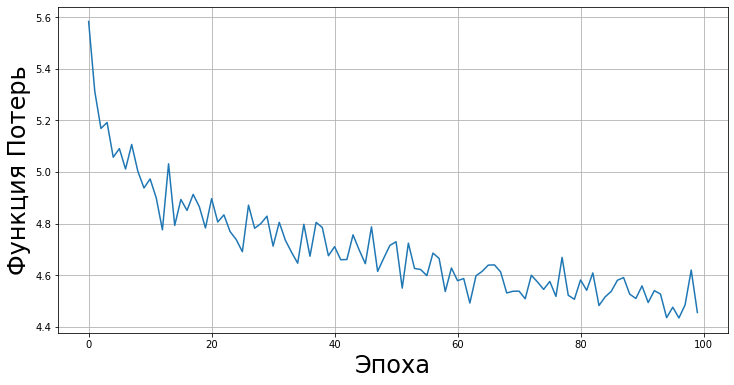

0.7579143389199255 0.765321746327333
True Positives:0.8205	True Negatives:0.7245
False Positives:0.1795	False Negatives:0.2755
Accuracy:0.7579
Recall:0.6138	Precision:0.8205
f1 measure:0.7023


C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [492]:
#Возьмем параметры из нашей модели
regr_no_addition = LogisticRegression(learning_rate=0.3,
                          epochs=100,batch_size=50)

regr_no_addition.fit(X_train, y_train)

regr_no_addition.plot_cost()

print(regr_no_addition.score(X_test, y_test), regr_no_addition.score(X_train, y_train))

regr_no_addition.classification_report(X_test, y_test)

In [493]:
X_poly_9   = to_polynom(X, order = 9)

X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_poly_9, y, test_size=0.3, random_state=42)


C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


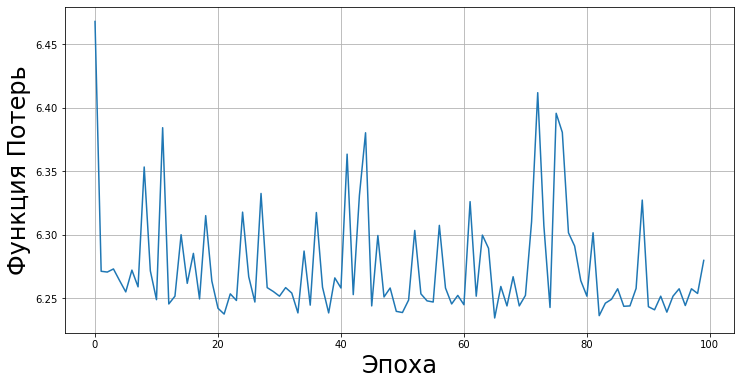

0.5496585971446306 0.5486388223818391
True Positives:0.9194	True Negatives:0.5473
False Positives:0.0806	False Negatives:0.4527
Accuracy:0.5497
Recall:0.0129	Precision:0.9194
f1 measure:0.0255


C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [494]:
regr = LogisticRegression(learning_rate=0.3,
                          epochs=100,batch_size=50)

regr.fit(X_train_9, y_train_9)

regr.plot_cost()

print(regr.score(X_test_9, y_test_9), regr.score(X_train_9, y_train_9))

regr.classification_report(X_test_9, y_test_9)

Логистическая регрессия с моими параметрами очень хорошо показывает себя и угадывает больше чем  в 75% случаев. Однако преобразованная через функцию to_polynom с order 9 работать стала модель хуже. Это говорит о том, что наши данные более линейные.

# Оценим влияние предварительной обработки

## Логарифм

In [495]:
data = pd.read_csv('log.csv')
data = data.drop('Unnamed: 0',axis=1)
data.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Mileage,Distance_per_price,Car_Status
0,Toyota,Prius,7.606387,Hatchback,12.180755,7.495542,Hybrid,1,8.955448,11,9.782860,со средним пробегом,3.225307,1
1,Renault,Grand Scenic,7.607878,Universal,11.813030,7.313220,Diesel,0,9.053687,8,9.733589,со средним пробегом,2.759343,1
2,Renault,Laguna,7.606885,Universal,11.608236,7.313220,Diesel,0,8.787220,10,9.305651,со средним пробегом,2.821015,1
3,Opel,Astra,7.603898,Universal,12.206073,7.377759,Metan/Propan,0,8.318742,16,9.433484,со средним пробегом,3.887330,1
4,Mercedes,Vito,7.600902,Microvan,12.611538,7.696213,Diesel,0,8.157657,22,9.520495,со средним пробегом,4.453881,0


In [496]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year','Distance_per_price']

In [497]:
X = data[num_columns]
y = data['Transmission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

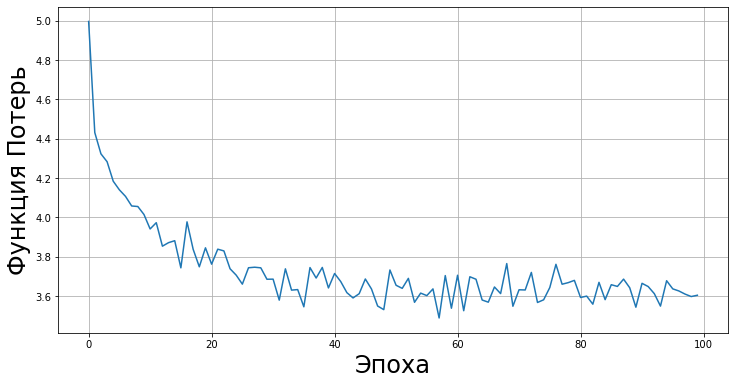

0.6696461824953445 0.6578522656734948
True Positives:0.5917	True Negatives:0.8864
False Positives:0.4083	False Negatives:0.1136
Accuracy:0.6696
Recall:0.9354	Precision:0.5917
f1 measure:0.7248


In [498]:
regr_log = LogisticRegression(learning_rate=0.3,
                          epochs=100,batch_size=50)

regr_log.fit(X_train, y_train)

regr_log.plot_cost()

print(regr_log.score(X_test, y_test), regr_log.score(X_train, y_train))

regr_log.classification_report(X_test, y_test)

## Стандартизация

In [499]:
data = pd.read_csv('standartization.csv')
data = data.drop('Unnamed: 0',axis=1)
data.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Mileage,Distance_per_price,Car_Status
0,Toyota,Prius,0.376492,Hatchback,0.128983,-0.112516,Hybrid,1,-0.179081,11,0.377953,со средним пробегом,-0.309971,1
1,Renault,Grand Scenic,0.793761,Universal,-0.490816,-0.604496,Diesel,0,-0.095044,8,0.261792,со средним пробегом,-0.436359,1
2,Renault,Laguna,0.515582,Universal,-0.749065,-0.604496,Diesel,0,-0.305136,10,-0.538943,со средним пробегом,-0.422814,1
3,Opel,Astra,-0.318957,Universal,0.180633,-0.440503,Metan/Propan,0,-0.562500,16,-0.334500,со средним пробегом,0.008557,1
4,Mercedes,Vito,-1.153495,Microvan,1.213632,0.543457,Diesel,0,-0.626578,22,-0.179619,со средним пробегом,0.509958,0


In [500]:
X = data[num_columns]
y = data['Transmission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

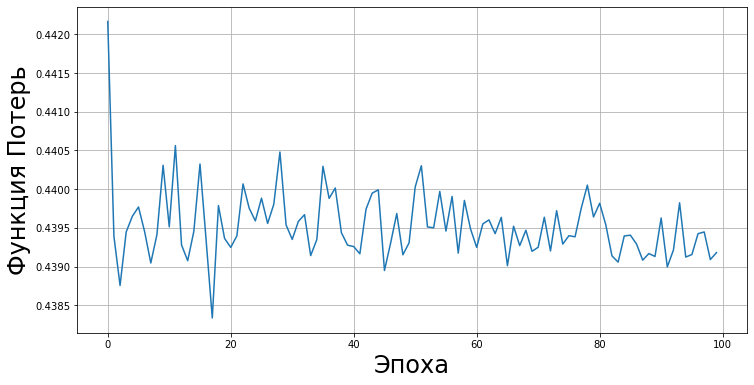

0.8075729360645562 0.8083178150217256
True Positives:0.8442	True Negatives:0.7835
False Positives:0.1558	False Negatives:0.2165
Accuracy:0.8076
Recall:0.7190	Precision:0.8442
f1 measure:0.7766


In [501]:
regr_st = LogisticRegression(learning_rate=0.3,
                          epochs=100,batch_size=50)

regr_st.fit(X_train, y_train)

regr_st.plot_cost()

print(regr_st.score(X_test, y_test), regr_st.score(X_train, y_train))

regr_st.classification_report(X_test, y_test)

## Нормализация

In [502]:
data = pd.read_csv('normalization.csv')
data = data.drop('Unnamed: 0',axis=1)
data.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Mileage,Distance_per_price,Car_Status
0,Toyota,Prius,0.80,Hatchback,0.194919,0.333333,Hybrid,1,0.075651,11,0.353252,со средним пробегом,0.009309,1
1,Renault,Grand Scenic,0.86,Universal,0.134913,0.270833,Diesel,0,0.083667,8,0.336172,со средним пробегом,0.005841,1
2,Renault,Laguna,0.82,Universal,0.109911,0.270833,Diesel,0,0.063627,10,0.218437,со средним пробегом,0.006213,1
3,Opel,Astra,0.70,Universal,0.199920,0.291667,Metan/Propan,0,0.039078,16,0.248497,со средним пробегом,0.018048,1
4,Mercedes,Vito,0.58,Microvan,0.299930,0.416667,Diesel,0,0.032966,22,0.271270,со средним пробегом,0.031804,0


In [503]:
X = data[num_columns]
y = data['Transmission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

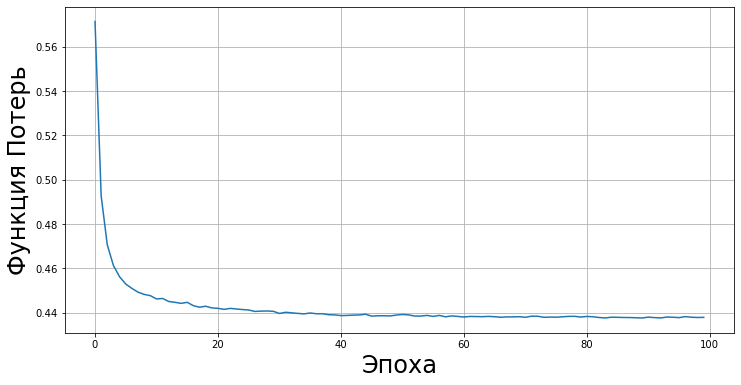

0.8085661080074488 0.8081936685288641
True Positives:0.8510	True Negatives:0.7814
False Positives:0.1490	False Negatives:0.2186
Accuracy:0.8086
Recall:0.7134	Precision:0.8510
f1 measure:0.7761


In [504]:
regr_norm = LogisticRegression(learning_rate=0.3,
                          epochs=100,batch_size=50)

regr_norm.fit(X_train, y_train)

regr_norm.plot_cost()

print(regr_norm.score(X_test, y_test), regr_norm.score(X_train, y_train))

regr_norm.classification_report(X_test, y_test)

## 2.3 One-Hot

In [505]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns_oh = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year','Distance_per_price','Cheap','Affordable','Luxury']

In [506]:
data = pd.read_csv('for_one_hot_encoding.csv', delimiter = ',')
data.tail(10)

,Unnamed: 0,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Mileage,Distance_per_price,Car_Status
32210,32210,Opel,Astra,2012,Universal,180000.0,1300.0,Diesel,0,6400.0,10,18000.000000,со средним пробегом,28.125000,Affordable
32211,32211,Toyota,Avensis Verso,2004,Minivan,245627.0,2000.0,Diesel,0,7490.0,18,13645.944444,со средним пробегом,32.793992,Affordable
32212,32212,Renault,Megane,2011,Sedan,145000.0,1500.0,Diesel,1,6200.0,11,13181.818182,со средним пробегом,23.387097,Affordable
32213,32213,Toyota,Auris,2007,Hatchback,222111.0,1400.0,Diesel,1,4444.0,15,14807.400000,со средним пробегом,49.979973,Affordable
32214,32214,Skoda,Superb,2016,Cabriolet,78900.0,2000.0,Petrol,1,21000.0,6,13150.000000,со средним пробегом,3.757143,Luxury
32215,32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,1,11500.0,6,14666.666667,со средним пробегом,7.652174,Affordable
32216,32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,0,4400.0,20,11250.000000,со средним пробегом,51.136364,Affordable
32217,32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,0,7000.0,7,12714.285714,со средним пробегом,12.714286,Affordable
32218,32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,0,4000.0,16,23125.000000,с большим пробегом,92.500000,Affordable
32219,32219,Renault,Grand Scenic,2006,Minivan,300000.0,1500.0,Diesel,0,4000.0,16,18750.000000,со средним пробегом,75.000000,Affordable


In [507]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
one_hot_data = data.copy()
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(data[['Car_Status']])
one_hot = one_hot_data.assign(Affordable = [i[0] for i in ohe.fit_transform(data[['Car_Status']])], Cheap = [i[1] for i in ohe.fit_transform(data[['Car_Status']])],
              Luxury = [i[2] for i in ohe.fit_transform(data[['Car_Status']])])
one_hot_data.tail(10)

,Unnamed: 0,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Mileage,Distance_per_price,Car_Status
32210,32210,Opel,Astra,2012,Universal,180000.0,1300.0,Diesel,0,6400.0,10,18000.000000,со средним пробегом,28.125000,Affordable
32211,32211,Toyota,Avensis Verso,2004,Minivan,245627.0,2000.0,Diesel,0,7490.0,18,13645.944444,со средним пробегом,32.793992,Affordable
32212,32212,Renault,Megane,2011,Sedan,145000.0,1500.0,Diesel,1,6200.0,11,13181.818182,со средним пробегом,23.387097,Affordable
32213,32213,Toyota,Auris,2007,Hatchback,222111.0,1400.0,Diesel,1,4444.0,15,14807.400000,со средним пробегом,49.979973,Affordable
32214,32214,Skoda,Superb,2016,Cabriolet,78900.0,2000.0,Petrol,1,21000.0,6,13150.000000,со средним пробегом,3.757143,Luxury
32215,32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,1,11500.0,6,14666.666667,со средним пробегом,7.652174,Affordable
32216,32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,0,4400.0,20,11250.000000,со средним пробегом,51.136364,Affordable
32217,32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,0,7000.0,7,12714.285714,со средним пробегом,12.714286,Affordable
32218,32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,0,4000.0,16,23125.000000,с большим пробегом,92.500000,Affordable
32219,32219,Renault,Grand Scenic,2006,Minivan,300000.0,1500.0,Diesel,0,4000.0,16,18750.000000,со средним пробегом,75.000000,Affordable


In [508]:
X = one_hot[num_columns_oh]
y = one_hot['Transmission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


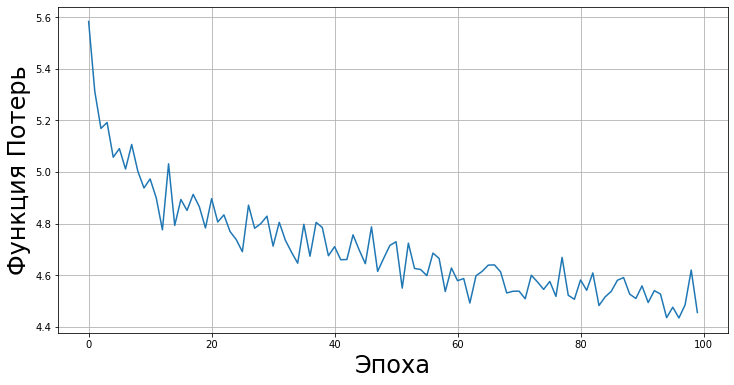

0.7579143389199255 0.765321746327333
True Positives:0.8205	True Negatives:0.7245
False Positives:0.1795	False Negatives:0.2755
Accuracy:0.7579
Recall:0.6138	Precision:0.8205
f1 measure:0.7023


C:\Temp\ipykernel_4356\3898968993.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [509]:
regr_oh = LogisticRegression(learning_rate=0.3,
                          epochs=100,batch_size=50)

regr_oh.fit(X_train, y_train)

regr_oh.plot_cost()

print(regr_oh.score(X_test, y_test), regr_oh.score(X_train, y_train))

regr_oh.classification_report(X_test, y_test)

# Вывод по 2.2 и 2.3

Новый придуманный признак не повлиял на точность модели. Предобработка наоборот снизили точность модели, что, как по мне, странно.

# 2.4

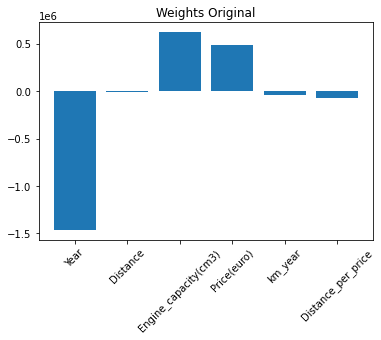

In [515]:
w, b = regr_no_addition.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),num_columns, rotation = 45 )
plt.title('Weights Original')
plt.show()

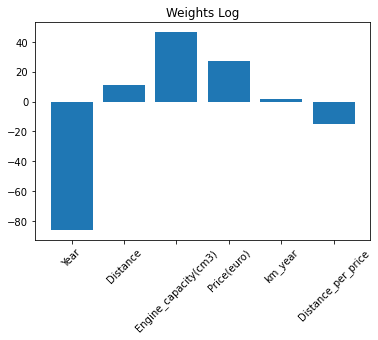

In [516]:
w, b = regr_log.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),num_columns, rotation = 45 )
plt.title('Weights Log')
plt.show()

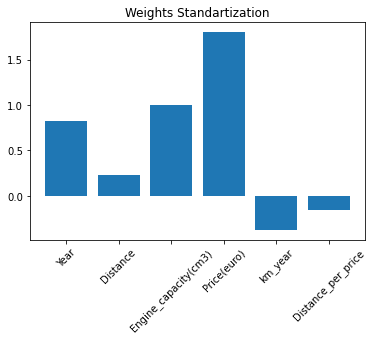

In [517]:
w, b = regr_st.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),num_columns, rotation = 45 )
plt.title('Weights Standartization')
plt.show()

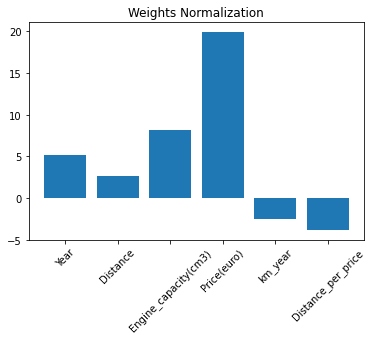

In [518]:
w, b = regr_norm.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),num_columns, rotation = 45 )
plt.title('Weights Normalization')
plt.show()

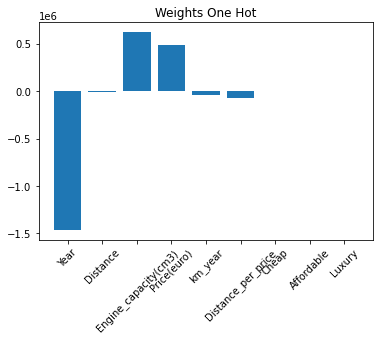

In [519]:
w, b = regr_oh.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),num_columns_oh, rotation = 45 )
plt.title('Weights One Hot')
plt.show()

Наиболее важными признаком оказались Year,Engine_Capacity(cm3) и  Price(euro). Новые признаки не имели сильного влияния.